# Домашная работа. Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём репозитории.

#### Полезная литература

- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [3]:
import pandas as pd
pd.__version__

'2.2.3'

## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета результатов экзаменов студентов  https://www.kaggle.com/spscientist/students-performance-in-exams. 

Первые несколько строк данных:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):

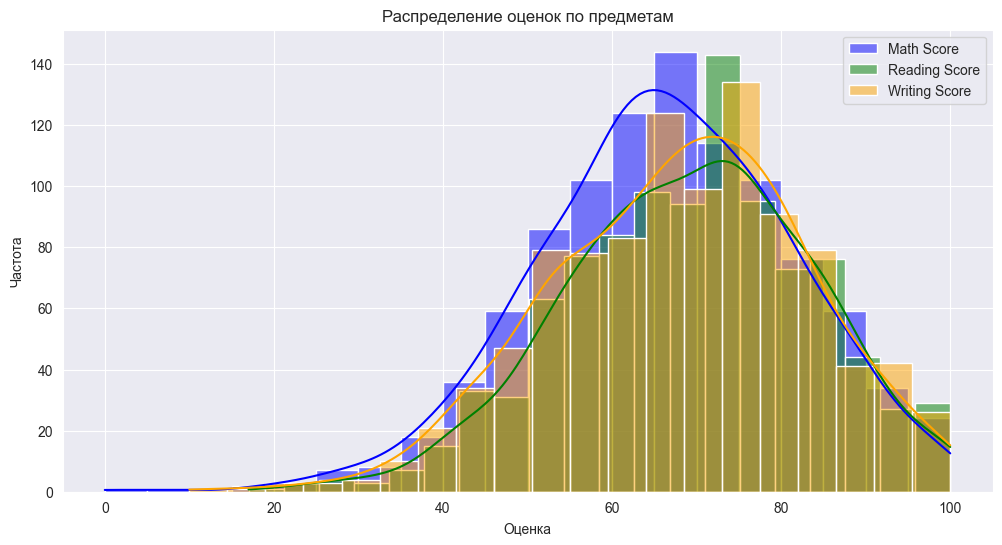

<Figure size 1000x500 with 0 Axes>

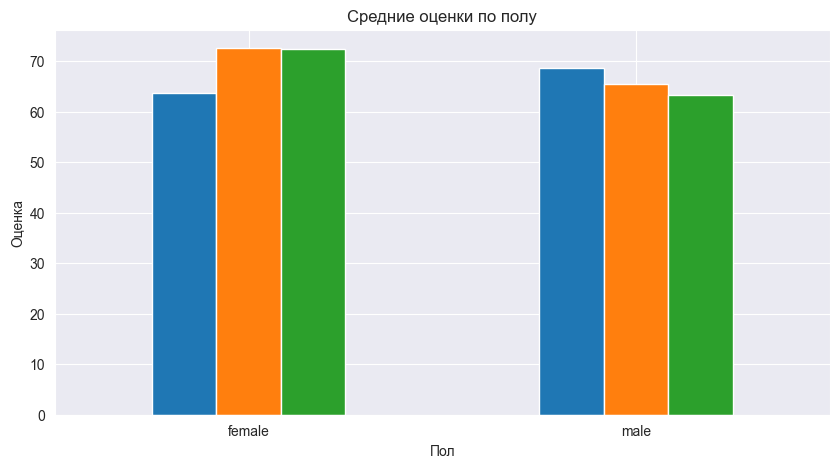

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('data/StudentsPerformance.csv')

print("Первые несколько строк данных:")
print(data.head())

print("\nИнформация о датасете:")
print(data.info())

print("\nПроверка на наличие пропущенных значений:")
print(data.isnull().sum())

#Распределение оценок по предметам
plt.figure(figsize=(12, 6))
sns.histplot(data['math score'], bins=20, kde=True, color='blue', label='Math Score')
sns.histplot(data['reading score'], bins=20, kde=True, color='green', label='Reading Score')
sns.histplot(data['writing score'], bins=20, kde=True, color='orange', label='Writing Score')
plt.legend()
plt.title('Распределение оценок по предметам')
plt.xlabel('Оценка')
plt.ylabel('Частота')
plt.show()

#Сравнение средних оценок по полу
gender_means = data.groupby('gender')[['math score', 'reading score', 'writing score']].mean().reset_index()

plt.figure(figsize=(10, 5))
gender_means.plot(x='gender', kind='bar', figsize=(10, 5), legend=False)
plt.title('Средние оценки по полу')
plt.ylabel('Оценка')
plt.xlabel('Пол')
plt.xticks(rotation=0)
plt.show()


## Задания
#### 1. Постройте 3 графика, показывающих распределение результатов экзаменов (каждый график на предмет).


Графики должны быть в одном ряду и у них должен быть общий заголовок "Результаты экзаменов".

Для результатов каждого экзамена посчитайте медианные значения.


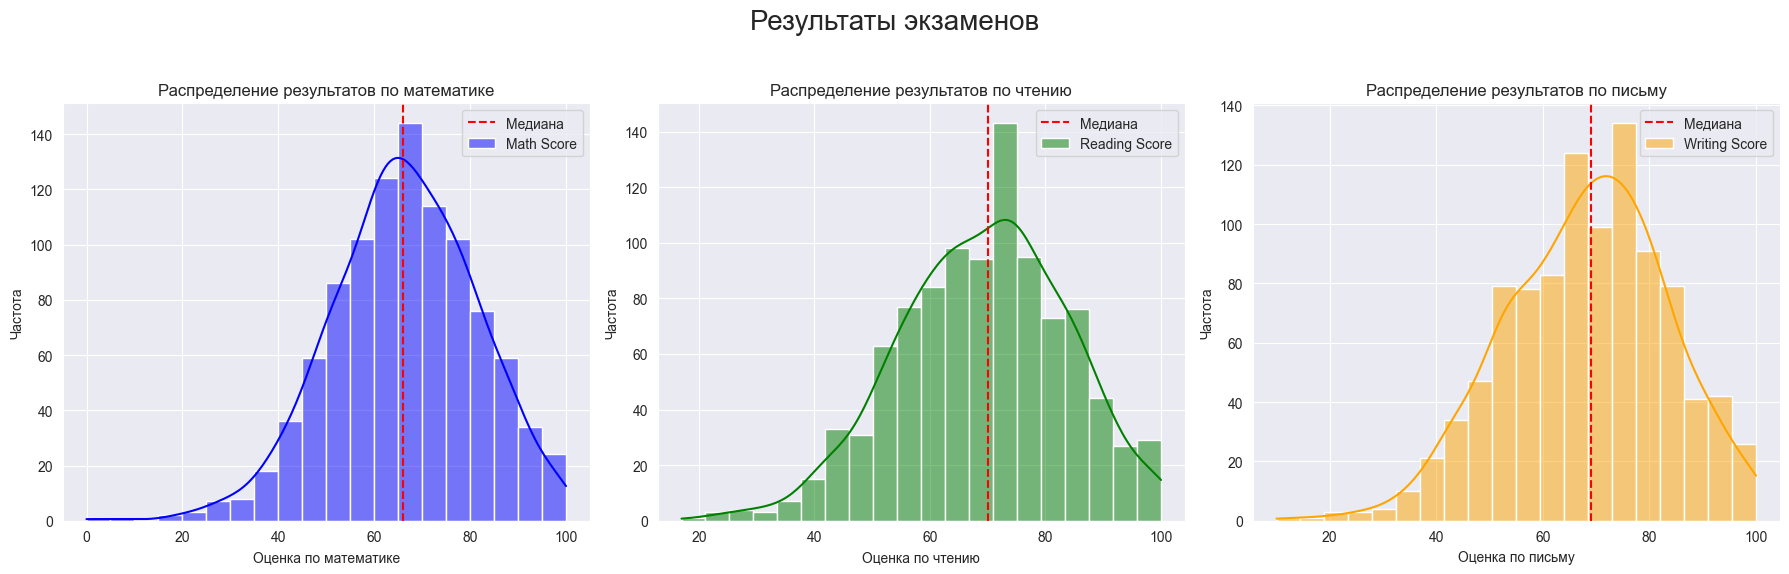

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('data/StudentsPerformance.csv')

median_math = data['math score'].median()
median_reading = data['reading score'].median()
median_writing = data['writing score'].median()

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)  # 1 ряд, 3 столбца, 1-й график
sns.histplot(data['math score'], bins=20, kde=True, color='blue', label='Math Score')
plt.axvline(median_math, color='red', linestyle='--', label='Медиана')
plt.title('Распределение результатов по математике')
plt.xlabel('Оценка по математике')
plt.ylabel('Частота')
plt.legend()

plt.subplot(1, 3, 2)  
sns.histplot(data['reading score'], bins=20, kde=True, color='green', label='Reading Score')
plt.axvline(median_reading, color='red', linestyle='--', label='Медиана')
plt.title('Распределение результатов по чтению')
plt.xlabel('Оценка по чтению')
plt.ylabel('Частота')
plt.legend()

plt.subplot(1, 3, 3)  
sns.histplot(data['writing score'], bins=20, kde=True, color='orange', label='Writing Score')
plt.axvline(median_writing, color='red', linestyle='--', label='Медиана')
plt.title('Распределение результатов по письму')
plt.xlabel('Оценка по письму')
plt.ylabel('Частота')
plt.legend()

plt.suptitle('Результаты экзаменов', fontsize=20)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.show()

#### 2. Образование родителей
Какие уровни образование есть в столбце *'parental level of education'* и сколько строк в датафрейме соответствует каждому уровню? 

Постройте график и ответьте на вопрос ниже

Отличаются ли баллы по математике у детей с разным образованием родителей?
Постройте график, где по оси Х находятся уровни образования родителей, а по У - баллы по математике.


Уровни образования родителей и количество строк в датафрейме:
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


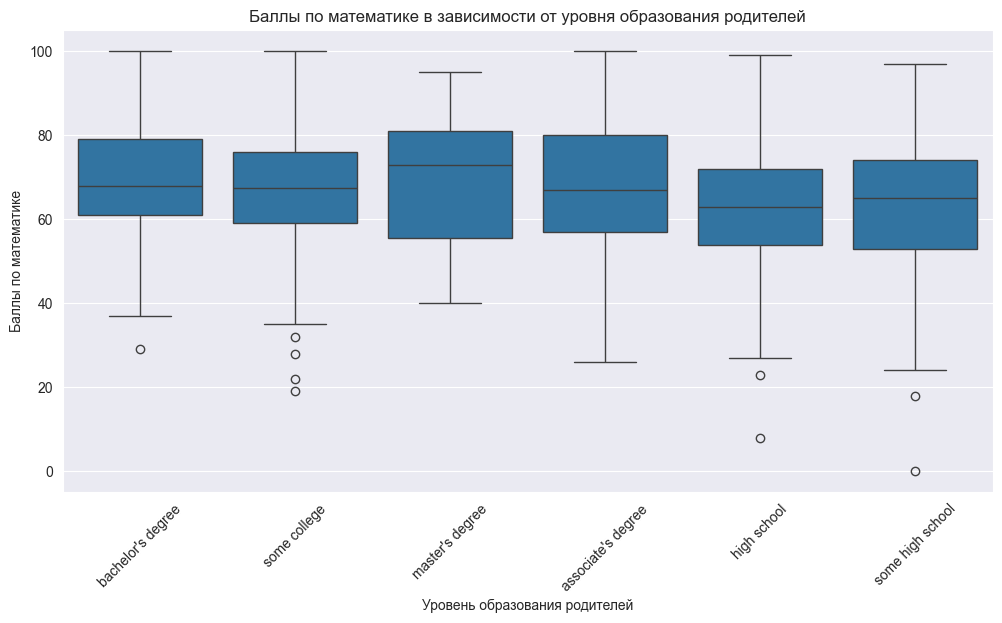


Результаты ANOVA:
F-статистика: 6.52, p-значение: 0.0000
Есть различия в баллах по математике в зависимости от уровня образования родителей.


In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

data = pd.read_csv('data/StudentsPerformance.csv')

education_counts = data['parental level of education'].value_counts()
print("Уровни образования родителей и количество строк в датафрейме:")
print(education_counts)

plt.figure(figsize=(12, 6))
sns.boxplot(x='parental level of education', y='math score', data=data)
plt.title('Баллы по математике в зависимости от уровня образования родителей')
plt.xlabel('Уровень образования родителей')
plt.ylabel('Баллы по математике')
plt.xticks(rotation=45)
plt.show()

education_levels = data['parental level of education'].unique()
samples = [data[data['parental level of education'] == level]['math score'] for level in education_levels]

samples = [s for s in samples if len(s) > 0]

if len(samples) < 2:
    print("Недостаточно групп для выполнения ANOVA.")
else:
    anova_result = stats.f_oneway(*samples)
    
    print("\nРезультаты ANOVA:")
    print(f"F-статистика: {anova_result.statistic:.2f}, p-значение: {anova_result.pvalue:.4f}")

    if anova_result.pvalue < 0.05:
        print("Есть различия в баллах по математике в зависимости от уровня образования родителей.")
    else:
        print("Нет различий в баллах по математике в зависимости от уровня образования родителей.")

#### 3. Выведите число студенток, набравших больше 90 баллов по всем предметам.


In [23]:
import pandas as pd

data = pd.read_csv('data/StudentsPerformance.csv')

students_above_90 = data[(data['gender'] == 'female') & 
                          (data['math score'] > 90) & 
                          (data['reading score'] > 90) & 
                          (data['writing score'] > 90)]

number_of_females_above_90 = len(students_above_90)
print(f"Количество студенток, набравших больше 90 баллов по всем предметам: {number_of_females_above_90}")

Количество студенток, набравших больше 90 баллов по всем предметам: 17


#### 4. Сравните баллы у студентов разных полов. Используя agg() выведите минимальное, максимальное и медианное значение
 

In [24]:
import pandas as pd

data = pd.read_csv('data/StudentsPerformance.csv')

agg_results = data.groupby('gender').agg(
    min_math=('math score', 'min'),
    max_math=('math score', 'max'),
    median_math=('math score', 'median'),
    min_reading=('reading score', 'min'),
    max_reading=('reading score', 'max'),
    median_reading=('reading score', 'median'),
    min_writing=('writing score', 'min'),
    max_writing=('writing score', 'max'),
    median_writing=('writing score', 'median')
)

print("Сравнение баллов у студентов разных полов:")
print(agg_results)


Сравнение баллов у студентов разных полов:
        min_math  max_math  median_math  min_reading  max_reading  \
gender                                                              
female         0       100         65.0           17          100   
male          27       100         69.0           23          100   

        median_reading  min_writing  max_writing  median_writing  
gender                                                            
female            73.0           10          100            74.0  
male              66.0           15          100            64.0  


#### 5. Выясните, влияет ли обед и подготовка к тесту на средний балл студентов разного пола 
###### (подсказка: используете agg())

In [26]:
import pandas as pd

data = pd.read_csv('data/StudentsPerformance.csv')

agg_results = data.groupby(['gender', 'lunch', 'test preparation course']).agg(
    mean_math=('math score', 'mean'),
    mean_reading=('reading score', 'mean'),
    mean_writing=('writing score', 'mean')
).reset_index()

print("Влияние обеда и подготовки к тесту на средний балл студентов разного пола:")
print(agg_results)

Влияние обеда и подготовки к тесту на средний балл студентов разного пола:
   gender         lunch test preparation course  mean_math  mean_reading  \
0  female  free/reduced               completed  60.785714     73.428571   
1  female  free/reduced                    none  52.890756     63.831933   
2  female      standard               completed  71.131579     79.798246   
3  female      standard                    none  66.530233     73.386047   
4    male  free/reduced               completed  65.639344     65.786885   
5    male  free/reduced                    none  60.609524     59.076190   
6    male      standard               completed  75.955752     72.601770   
7    male      standard                    none  69.832512     64.719212   

   mean_writing  
0     74.371429  
1     61.781513  
2     81.508772  
3     72.967442  
4     65.737705  
5     55.285714  
6     71.982301  
7     61.906404  


#### 6. Постройте график, показывающий зависимость уровня образования родителей от их расы 

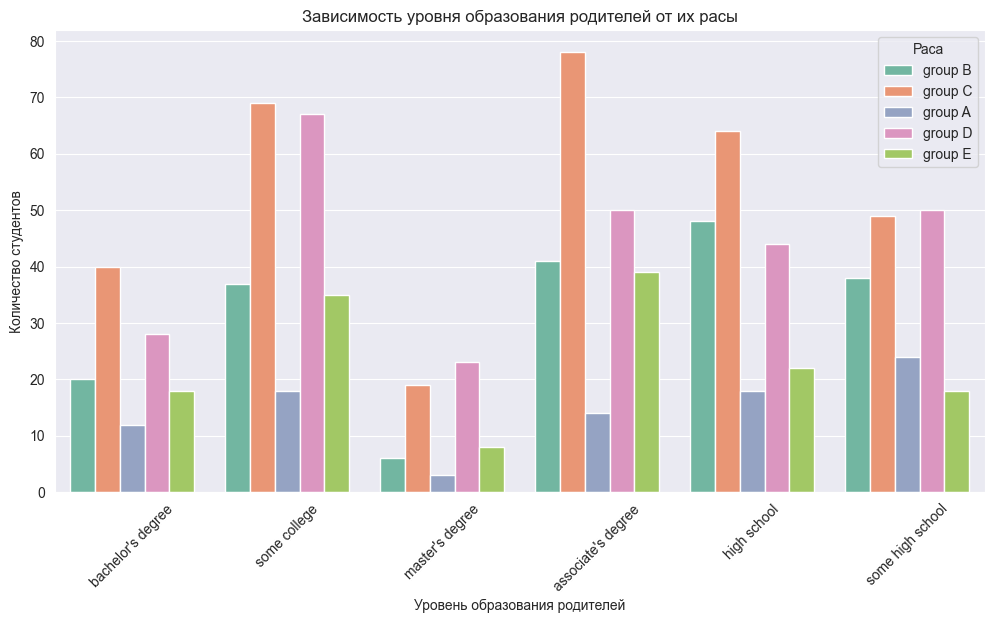

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('data/StudentsPerformance.csv')

plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='parental level of education', hue='race/ethnicity', palette='Set2')
plt.title('Зависимость уровня образования родителей от их расы')
plt.xlabel('Уровень образования родителей')
plt.ylabel('Количество студентов')
plt.xticks(rotation=45)
plt.legend(title='Раса')
plt.show()


#### 7. Постройте график, показывающий зависимость прохождения подготовительного теста от уровня образования родителей.


Кто чаще ходит на курсы: дети, родители которых закончили только старшую школу, или дети, чьи родители получили степень бакалавра\магистра?

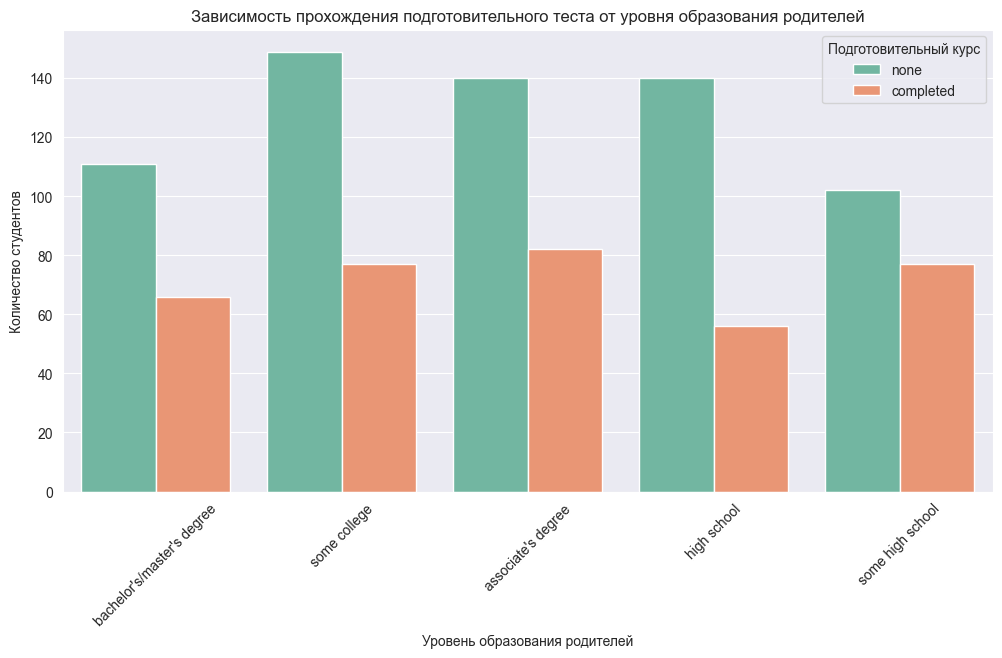


Количество студентов, чьи родители закончили только старшую школу:
test preparation course
none         102
completed     77
Name: count, dtype: int64

Количество студентов, чьи родители получили степень бакалавра/магистра:
test preparation course
none         111
completed     66
Name: count, dtype: int64
Дети, родители которых закончили только старшую школу, чаще проходят подготовительные курсы.


In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('data/StudentsPerformance.csv')

data['parental level of education'] = data['parental level of education'].replace({
    'bachelor\'s degree': 'bachelor\'s/master\'s degree',
    'master\'s degree': 'bachelor\'s/master\'s degree'
})

plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='parental level of education', hue='test preparation course', palette='Set2')
plt.title('Зависимость прохождения подготовительного теста от уровня образования родителей')
plt.xlabel('Уровень образования родителей')
plt.ylabel('Количество студентов')
plt.xticks(rotation=45)
plt.legend(title='Подготовительный курс')
plt.show()

high_school_count = data[data['parental level of education'] == 'some high school']['test preparation course'].value_counts()
bachelor_master_count = data[data['parental level of education'] == 'bachelor\'s/master\'s degree']['test preparation course'].value_counts()

print("\nКоличество студентов, чьи родители закончили только старшую школу:")
print(high_school_count)

print("\nКоличество студентов, чьи родители получили степень бакалавра/магистра:")
print(bachelor_master_count)

if high_school_count['completed'] > bachelor_master_count['completed']:
    print("Дети, родители которых закончили только старшую школу, чаще проходят подготовительные курсы.")
else:
    print("Дети, чьи родители получили степень бакалавра/магистра, чаще проходят подготовительные курсы.")


#### 8. Постройте plot.pie, показывающий, сколько людей сдали\не сдали экзамен по математике.

Сдавшим считается человек, набравший 40 баллов.

###### Подсказка: создайте столбец в датафрейме, который содержит результат сдачи (сдал или не сдал)

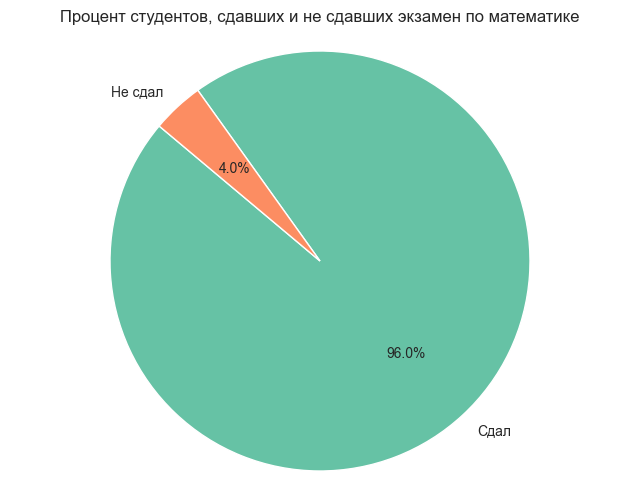

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data/StudentsPerformance.csv')

data['math_pass'] = data['math score'].apply(lambda x: 'Сдал' if x >= 40 else 'Не сдал')

pass_counts = data['math_pass'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(pass_counts, labels=pass_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62'])
plt.title('Процент студентов, сдавших и не сдавших экзамен по математике')
plt.axis('equal')  
plt.show()

#### 9. Постройте plot.pie, показывающий распределение студентов по оценкам

Оценки студентов выставляются по шкале:<br>
0  - 40 marks : grade E<br>
41 - 60 marks : grade D<br>
60 - 70 marks : grade C<br>
70 - 80 marks : grade B<br>
80 - 90 marks : grade A<br>
90 - 100 marks : grade O<br>

Для этого посчитайте сумму результатов за 3 экзамена и найдите среднее. Оценка выставляется по среднему значению. Если студент не сдал математику(даже если средний балл выше 40), он получает Е

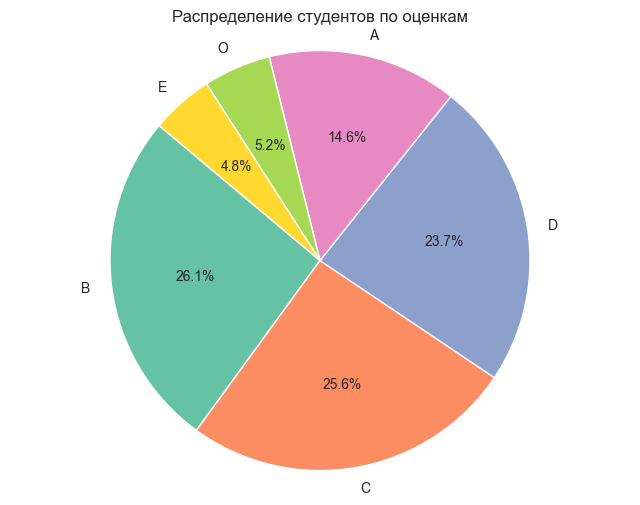

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data/StudentsPerformance.csv')

data['total_score'] = data['math score'] + data['reading score'] + data['writing score']
data['average_score'] = data['total_score'] / 3

def assign_grade(row):
    if row['math score'] < 40:
        return 'E'
    elif row['average_score'] >= 90:
        return 'O'
    elif row['average_score'] >= 80:
        return 'A'
    elif row['average_score'] >= 70:
        return 'B'
    elif row['average_score'] >= 60:
        return 'C'
    elif row['average_score'] >= 41:
        return 'D'
    else:
        return 'E'

data['grade'] = data.apply(assign_grade, axis=1)

grade_counts = data['grade'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f'])
plt.title('Распределение студентов по оценкам')
plt.axis('equal')  
plt.show()


#### 10. Постройте countplot, показывающий зависимость между итоговой оценкой студентов и его полом. Студенты какого пола получили больше оценок О, А, В

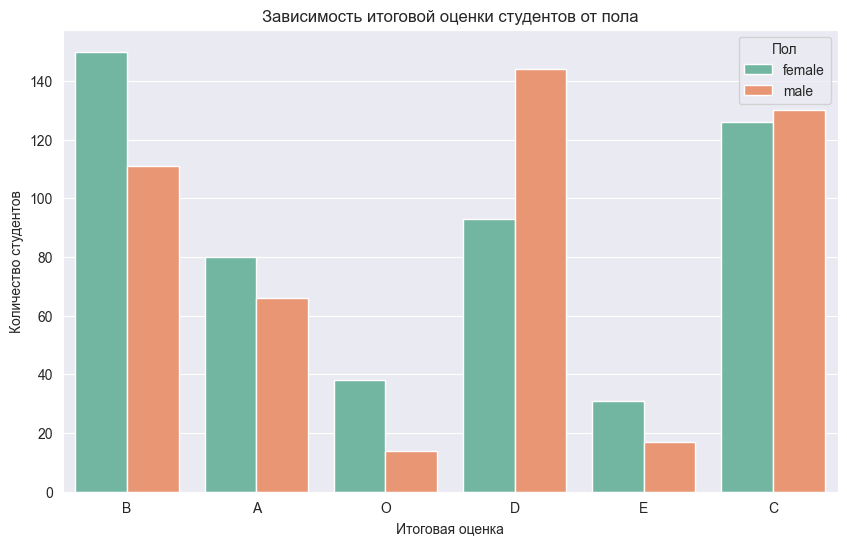

Количество студентов по оценкам и полу:
gender  female  male
grade               
A           80    66
B          150   111
C          126   130
D           93   144
E           31    17
O           38    14

Студенты какого пола получили больше оценок O, A, B?
grade
O    female
A    female
B    female
dtype: object


In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('data/StudentsPerformance.csv')

data['total_score'] = data['math score'] + data['reading score'] + data['writing score']
data['average_score'] = data['total_score'] / 3

def assign_grade(row):
    if row['math score'] < 40:
        return 'E'
    elif row['average_score'] >= 90:
        return 'O'
    elif row['average_score'] >= 80:
        return 'A'
    elif row['average_score'] >= 70:
        return 'B'
    elif row['average_score'] >= 60:
        return 'C'
    elif row['average_score'] >= 41:
        return 'D'
    else:
        return 'E'

data['grade'] = data.apply(assign_grade, axis=1)

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='grade', hue='gender', palette='Set2')
plt.title('Зависимость итоговой оценки студентов от пола')
plt.xlabel('Итоговая оценка')
plt.ylabel('Количество студентов')
plt.legend(title='Пол')
plt.show()

grade_gender_counts = data.groupby(['grade', 'gender']).size().unstack(fill_value=0)

print("Количество студентов по оценкам и полу:")
print(grade_gender_counts)

more_O_A_B = grade_gender_counts.loc[['O', 'A', 'B']].idxmax(axis=1)
print("\nСтуденты какого пола получили больше оценок O, A, B?")
print(more_O_A_B)
